# AIPC 2022-2023

<center>
    <img src="https://physique.univ-paris-diderot.fr/sites/all/themes/diderot/logo.png" height="300px" alt="Logo Université Paris Diderot" /> 
<img src="https://u-paris.fr/wp-content/uploads/2019/03/Universite_Paris_logo_horizontal.jpg" height=300 alt="Logo Université de Paris" />
</center>

---

## Introduction à python : exercices
![python logo](https://www.python.org/static/img/python-logo.png "Python")

## Exercice 1 : utiliser un Jupyter notebook et calculs simples

* Dans votre notebook python, créer au moins 4 cellules, une avec du texte brut (raw), une avec du Markdown et éventuellement des formules simples en $\LaTeX$, une avec du code.
* Calculer : 
 * $1+2\times 3$, 
 * $(1+2)\times 3$, 
 * $2^3$,
 * $5/3$, 
 * et la division entière ainsi que le reste de 5 divisé par 3
 * Calculer $\sin(\pi/2)$, $\arctan(1)$, $e^1$.
* Vérifier que $e^{i\pi}=-1$.

## Exercice 2 : structures de contrôle

* Créer une fonction qui calcule $$\sum_{i=0}^Ni$$ quand $N$ est donné en argument
* Créer une fonction qui produise ceci en sortie :

```
*
**
***
****
*****
******
```

* Créer une fonction qui indique lorsqu'un nombre est pair.

## Exercice 3 : un peu de mécanique…

Imaginons une masse de $m=1\;\textrm{kg}$ qui chute avec une vitesse initiale verticale $v_0$ de la position initiale $z_0=0$. 
Cette masse est sujette à une accélération de pesanteur $g$. On ne prend pas en compte de frottement ici.

* Calculer la position $z$ de la masse en fonction de $t$ à chaque seconde jusqu'à 10 secondes pour différentes vitesse initiales. Tracer $z(t)$.

* Modifier ce bout de code afin d'introduire l'outil`interact` widget, $v_0$ étant le paramètre.

## Exercice 4 : Statistiques simples

Imaginons un lot de 100 résistors. Le constructeur prétend qu'ils ont une résistance $R$ de $R_0=220\;\Omega$ avec une *erreurr* de $5\%$. 

Parce que l'on ne peut pas vraiment interpréter ce que le constructeur entend par *erreur*, on simule le lot de résistances sous les deux hypothèses suivantes : 
* soit la pdf de $R$ est plate à $\pm5\%$
* soit la pdf est normale avec $\sigma=R_0\times5\%$

Produire les histogrammes de ces deux distributions. Ajuster la seconde avec une gaussienne. Comparer la déviation standard avec le $\sigma$ ajusté. Être sûr d'être capable d'identifier tous les paramètres ajustés.

## Exercice 5 : Lire et analyser un fichier and analysing a file

* Lire le fichier `file2.txt` où l'on trouve en colonne les vecteurs de  where you will find in column vectors of `x` and vectors `y`. Then plot `y` versus `x`. 
* (more difficult) Read the `csv` output of a channel of a Tektronik scope, named `F0004CH2.CSV`. We are interested in plotting voltage versus time which are stored in latest columns. Find a way to do so. According to the solution you try, you may have to force the cast as a `float` of read values.

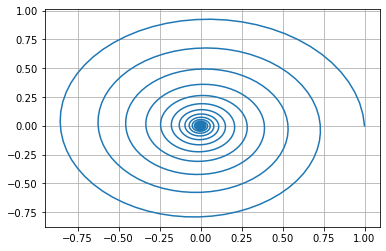

In [8]:
import matplotlib.pyplot as plt
with open('ex5.1.txt', 'r') as f:
    lines = f.readlines()
    x = [float(line.split()[0]) for line in lines]
    y = [float(line.split()[1]) for line in lines]
plt.plot(x ,y)
plt.grid()

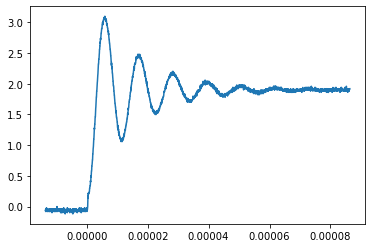

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import csv
t=np.array([])
y=np.array([])
with open('F0004CH2.CSV') as csvfile:
    r = csv.reader(csvfile,delimiter=',')
    for row in r:
        t=np.append(t,float(row[3]))
        y=np.append(y,float(row[4]))
plt.plot(t,y)

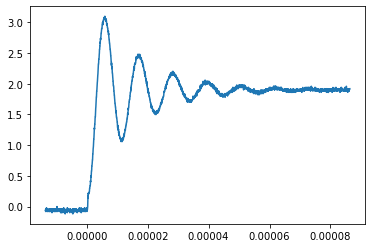

In [10]:
# Other solution with pandas, more efficient, more readable
import pandas
import matplotlib.pyplot as plt
data=pandas.read_csv('F0004CH2.CSV',usecols=[3,4],header=None,names=['time','voltage'])
plt.plot(data['time'],data['voltage'])

In [23]:
!pwd

/home/tbeau/PSA_1920


## Exercise 6 : Interaction with the arduino

Consider the Arudino program, already used, `Examples/04.Communication/PhysicalPixel`. When a `L` is sent to the Arduino, this switches off the internal LED, when a `H` is sent, this switches on the LED.

Write a python code in order to make the internal LED blinking, using the serial communication port.

*Caution. Of course, this python code needs to run on the local machine in order to use the hardware communication port.*

In [24]:
# Assume that arduino has the L/H Builtin LED program uploaded
import serial # needs the installation of pyserial throw the "pip install pyserial" command in python, with a reboot of the python kernel
import time
s=serial.Serial('COM6','9600') # change port id as needed
for i in range(100):
    s.write(b'L')
    time.sleep(0.5)
    s.write(b'H')
    time.sleep(0.5)

SerialException: [Errno 2] could not open port COM6: [Errno 2] No such file or directory: 'COM6'

## Exercise 7 : The capacitance-meter, the return

This is a mini-project !
* Choose in the electronics lab a couple $(R,C)$ so that $\tau=RC\approx5\;\textrm{s}$.
* Create an arduino program which charge once $C$ through $R$ and which send the voltage accross $C$ via the serial port
* Create a python program which read the serial port and then record the charge of $C$
* Plot this charge versus time
* Make a fit of the charging curve, extract the time constant $\tau$ with associated $1\sigma$ error.
* Assuming that $R$ is know, propose a measurement of $C$. 